# Finding the node hierarchies and covers of an anatomical neural network
In this example, we use ELK to find the community and hierarchical structure of retrograde tract-tracing network of the macaque monkey which contains the information of the number of neurons connecting an area from the macaque brain to each of the 29 injected areas. This network is very complex because it is dense, directed, and the weights are heterogeneous, covering several orders of magnitude.

In [1]:
T = True
F = False
# Personal libs ---- 
from modules.hieraranalysis import Hierarchy
from modules.hierarentropy import Hierarchical_Entropy
from plotting_jupyter.plotting_H import Plot_H
from plotting_jupyter.plotting_N import Plot_N
from modules.colregion import colregion
from networks.mac29 import MAC29
from various.network_tools import *

In [2]:

# Declare global variables ----
linkage = "single"
nlog10 = T
lookup = F
cut = F
mode = "ZERO"
topology = "MIX"
index  = "S1_2"

# Load structure ----
NET = MAC29()

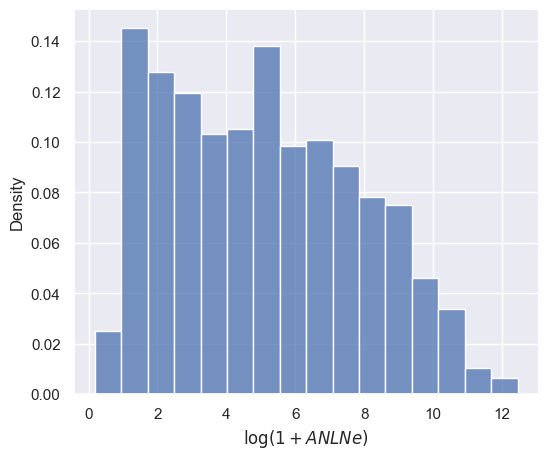

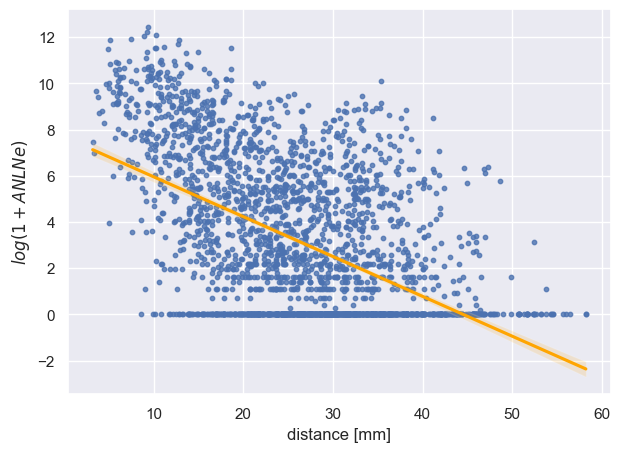

In [3]:
plot_n = Plot_N()
plot_n.histogramX(np.log(1+NET.C), width=6, height=5, labelx=r"$\log(1+ANLNe)$")
plot_n.regXY(
    NET.D[:, :NET.nodes], np.log(1 + NET.C), s=10, labelx="distance [mm]", labely=r"$log(1+ANLNe)$",
    width=7, height=5
)

In [4]:
## Hierarchy object!! ----
H = Hierarchy(
    NET.C, NET.nodes, linkage, mode,
    topology=topology,
    index=index,
    lookup=lookup
)
H.compute_H_features_cpp()
H.link_entropy_cpp("short", cut=cut)
H.la_abre_a_merde_cpp()
H.node_entropy_cpp("short", cut=cut)
H.set_entropy([
  H.node_entropy, H.node_entropy_H,
  H.link_entropy, H.link_entropy_H
])
# Set labels to network ----
L = colregion(NET)
L.get_regions((T, NET.regions))
H.set_colregion(L)

Compute link hierarchical agglomeration ----
	> Compute features
Starting Z2dict
Level information
Vertex entropy
Vertex entropy H
Level entropy
Level entropy H
Number of vertices in the tree: 1071

	link entropy :  Sh : 0.4114, and Sv : 0.5886


	link entropy H: Sh : 0.4111, and Sv : 0.5889

	> Compute the node hierarchy ----
Commencer: la abre a merde
25%
50%
75%
Voila, bon ami

	Node entropy :  Sh : 0.2390, and Sv : 0.7610


	Node entropy H: Sh : 0.2137, and Sv : 0.7863

Starting Z2dict
Level information
Vertex entropy
Vertex entropy H
Level entropy
Level entropy H
Number of vertices in the tree: 57


	> Visualize Hierarchical Entropy by levels!!!
Levels node hierarchy: 13
Levels link hierarchy: 38
            S dir                 c  level
34   0.051426   H  node_hierarchy_H      5
47   0.151007   V  node_hierarchy_H      5
5    0.051063   H    node_hierarchy      8
17   0.088875   V    node_hierarchy      9
150  0.035983   H  link_hierarchy_H     16
188  0.040106   V  link_hierarchy_H     16
73   0.026775   H    link_hierarchy     17
110  0.027376   V    link_hierarchy     18
	> Plot D as a function of K
	> Plot loop entropy as a function of K


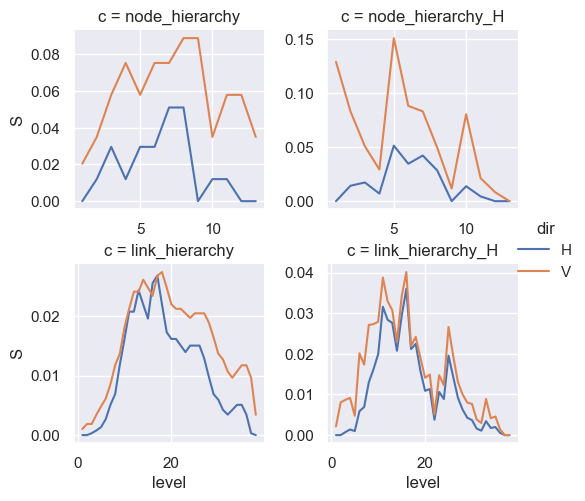

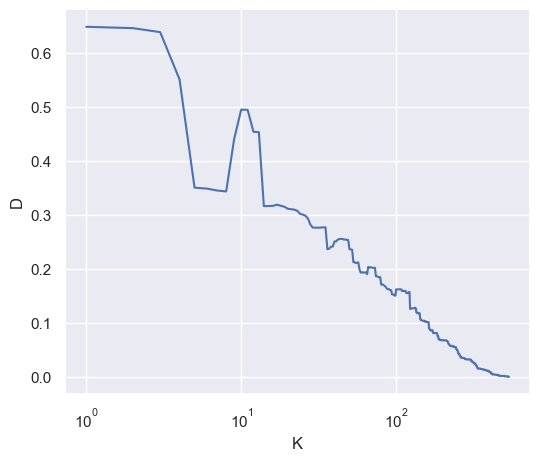

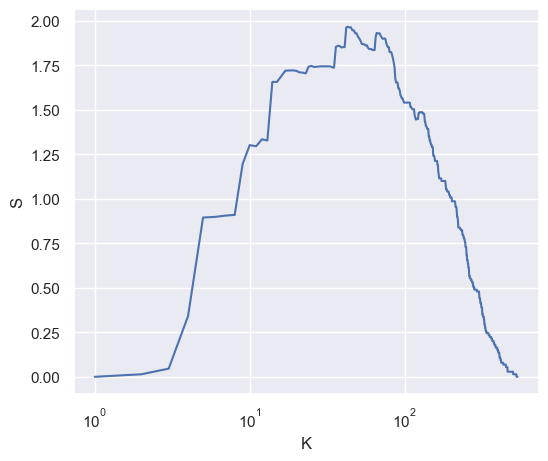

In [5]:
plot_h = Plot_H(H)
plot_h.plot_Hierarchical_Entropy(width=6, height=5)
plot_h.plotD(width=6, height=5)
plot_h.plotSloop(width=6, height=5)

/var/folders/qk/02c8jsfd5dd9zjj2qvs2gwsw0000gn/T/ipykernel_70639/1412669286.py:2: RuntimeWarning: divide by zero encountered in log
  NET.D[:NET.nodes, :NET.nodes], np.log(H.target_sim_matrix),
/var/folders/qk/02c8jsfd5dd9zjj2qvs2gwsw0000gn/T/ipykernel_70639/1412669286.py:7: RuntimeWarning: divide by zero encountered in log
  NET.D[:NET.nodes, :NET.nodes], np.log(H.source_sim_matrix),
/var/folders/qk/02c8jsfd5dd9zjj2qvs2gwsw0000gn/T/ipykernel_70639/1412669286.py:12: RuntimeWarning: divide by zero encountered in log
  np.log(H.source_sim_matrix), np.log(H.target_sim_matrix),


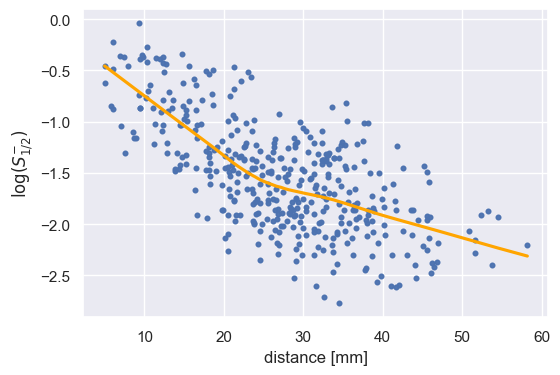

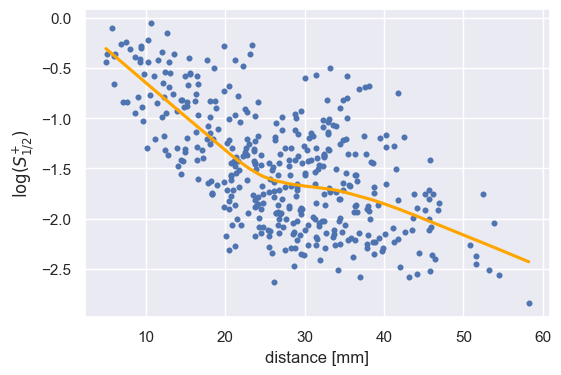

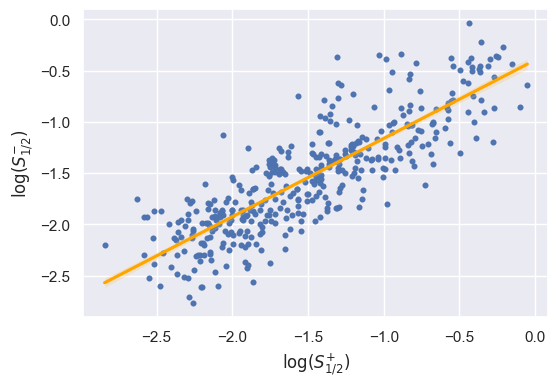

In [6]:

plot_n.regXY(
    NET.D[:NET.nodes, :NET.nodes], np.log(H.target_sim_matrix),
    s=10, lowess=T, width=6, height=4,
    labelx="distance [mm]", labely=r"$\log(S_{1/2}^{-})$"
)
plot_n.regXY(
    NET.D[:NET.nodes, :NET.nodes], np.log(H.source_sim_matrix),
    s=10, lowess=T, width=6, height=4,
    labelx="distance [mm]", labely=r"$\log(S_{1/2}^{+})$"
)
plot_n.regXY(
    np.log(H.source_sim_matrix), np.log(H.target_sim_matrix),
    s=10, width=6, height=4,
    labelx=r"$\log(S_{1/2}^{+})$", labely=r"$\log(S_{1/2}^{-})$"
)

Find node partition using _S
Best K: 43
Best R: 8	 Score: _S
['7a' '7b' '7m']


/Users/jmarti53/Documents/Projects/LINKPROJECT/ELK/modules/hieraranalysis.py:344: RuntimeWarning: divide by zero encountered in divide
  Dsource = 1 / self.source_sim_matrix + 1
/Users/jmarti53/Documents/Projects/LINKPROJECT/ELK/modules/hieraranalysis.py:345: RuntimeWarning: divide by zero encountered in divide
  Dtarget = 1 / self.target_sim_matrix + 1


Visualize nodal dendrogram!!!


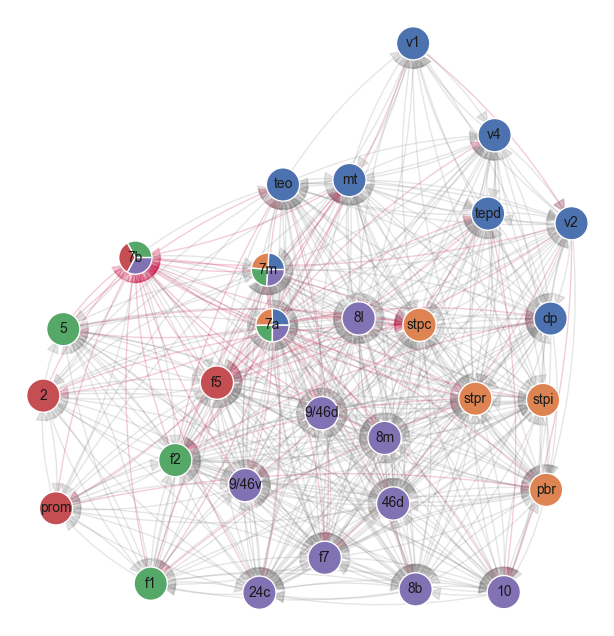

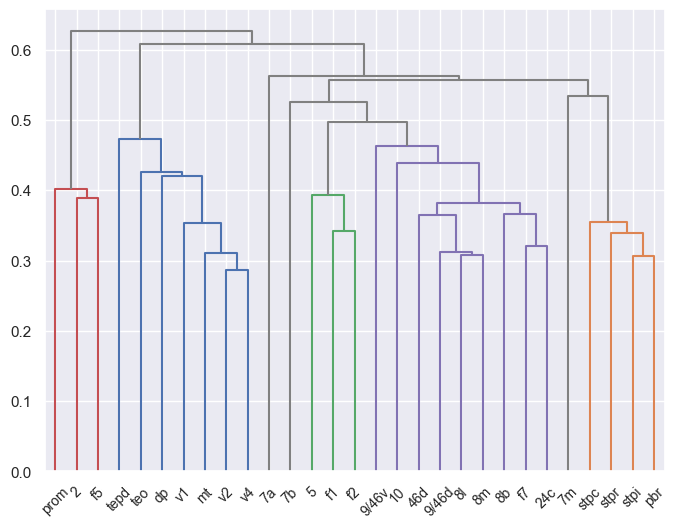

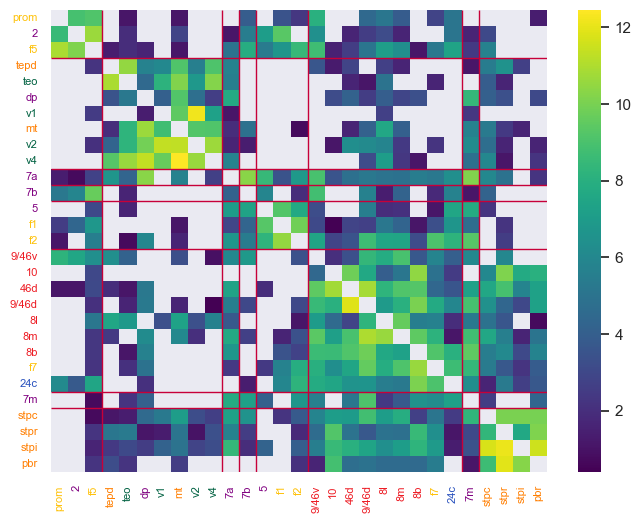

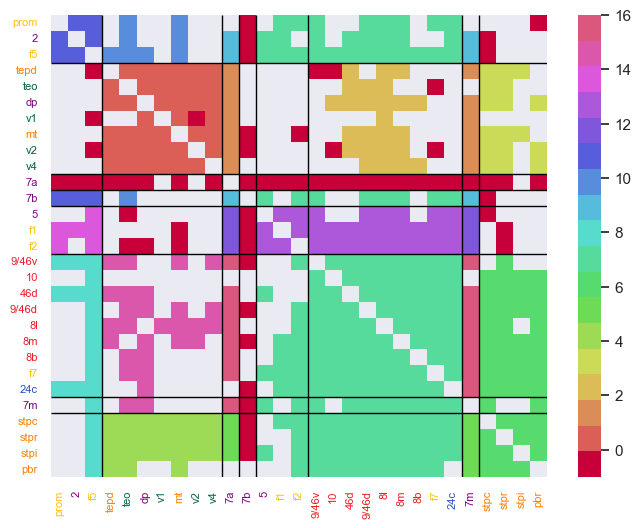

In [9]:
SCORE = "_S"
k, r = get_best_kr_equivalence(SCORE, H)
print(f"Find node partition using {SCORE}")
print("Best K: {}\nBest R: {}\t Score: {}".format(k, r, SCORE))
rlabels = get_labels_from_Z(H.Z, r)
# Overlap ----
overlap, nocs_covers, nocs_sizes  = H.discovery(k, rlabels)
print(overlap)
plot_h.plot_network_combined(
  k, np.log(1 + NET.C[:NET.nodes, :]), rlabels,
  nocs_covers, nocs_sizes, cmap_name="deep", font_size=10
)
plot_h.nodal_dendrogram(r, width=8, height=6, cmap_name="deep") #
plot_h.heatmap_dendro(r, np.log(1 + NET.C[:NET.nodes, :]), font_size=8, width=8, height=6)
plot_h.lcmap_dendro(r, k, font_size=8, width=8, height=6)

Print hierarchy newicks
Print hierarchy newicks


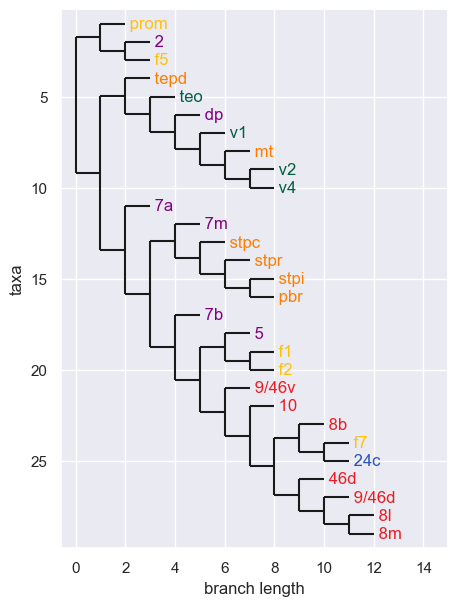

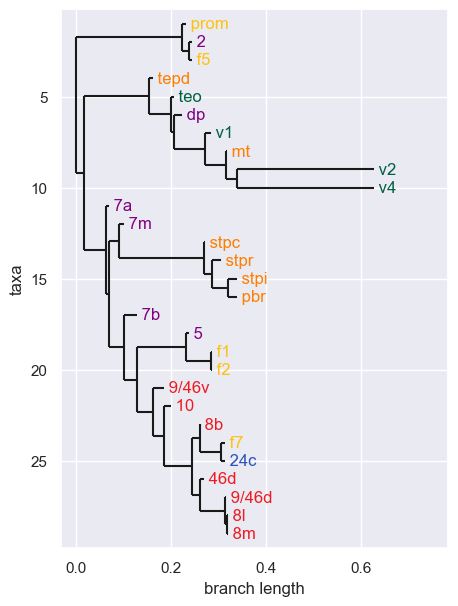

In [8]:
S = Hierarchical_Entropy(H.Z, H.nodes, H.colregion.labels[:H.nodes])
S.Z2dict("short")
tree = S.zdict2newick(S.tree, weighted=F, on=T)
treeh = S.zdict2newick(S.tree, weighted=T, on=T)
plot_h.plot_newick(tree, width=5, height=7)
plot_h.plot_newick(treeh, width=5, height=7)